# Homework 3

I've changed my project to using UFS P7 Reforecast data (z500, TS, and Precip) for August September and October looking at the Southeast region of the United States, and seeing if I can use that data to predict hurricane activity (or something like that). 

For homework 3, I wasn't quite sure what to do, but I used the hurricane activity index. 

In [35]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

In [2]:
path='/home/ldoyle4/'
file='hurricane.data'
index_name='ha'

df=pd.read_table(path+file,skiprows=64,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(6).index,inplace=True)

In [3]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-31'
print(start_date)
print(end_date)

2011-1-01
2016-12-31


In [4]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [5]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [6]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='ha')
ds_index

<xarray.Dataset>
Dimensions:  (time: 72)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2016-12-01
Data variables:
    ha       (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 6.0 3.5 15.5 1.5 0.0

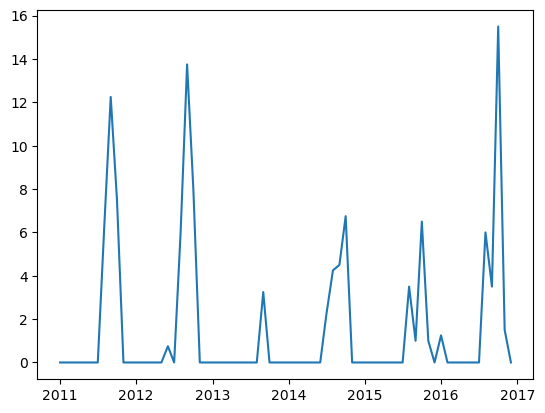

In [7]:
plt.plot(ds_index['time'],ds_index['ha'])

In [8]:
file='/scratch/ldoyle4/subset/ts.nc'
ds_ts = xr.open_dataset(file)
ds_ts

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    ts         (time, latitude, longitude) float64 ...
Attributes:
    history:                   Mon Oct 10 18:10:15 2022: ncatted -a calendar,...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [9]:
ts_mon1 = ds_ts.resample(time="MS").mean()

In [10]:
ts_mon1

<xarray.Dataset>
Dimensions:    (time: 63, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    ts         (time, latitude, longitude) float64 305.2 304.0 ... 302.0 302.0

In [11]:
def is_ASO(month):
    return (month >= 8) & (month <= 10)
ts_monthly = ts_mon1.sel(time=is_ASO(ts_mon1['time.month']))

In [12]:
ts_monthly

<xarray.Dataset>
Dimensions:    (time: 18, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    ts         (time, latitude, longitude) float64 305.2 304.0 ... 302.0 302.0

In [13]:
def is_ASO(month):
    return (month >= 8) & (month <= 10)
ha_index = ds_index.sel(time=is_ASO(ds_index['time.month']))

In [14]:
ha_index

<xarray.Dataset>
Dimensions:  (time: 18)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
Data variables:
    ha       (time) float32 6.25 12.25 7.5 6.0 13.75 ... 1.0 6.5 6.0 3.5 15.5

In [15]:
clim_index = ha_index.groupby('time.month').mean()

In [16]:
clim_index

<xarray.Dataset>
Dimensions:  (month: 3)
Coordinates:
  * month    (month) int64 8 9 10
Data variables:
    ha       (month) float32 4.333 6.375 7.375

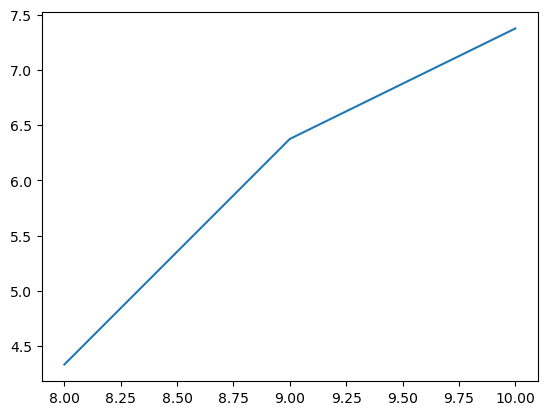

In [17]:
plt.plot(clim_index.ha['month'],clim_index.ha)

Average Total Storms Per Month:

August: =<4

September: =<6

October: >=3

In [18]:
august=ha_index['ha'].where(ha_index['ha']<=4)
september=ha_index['ha'].where(ha_index['ha']<=6)
october=ha_index['ha'].where(ha_index['ha']>=3)

August:  6
September:  10
October:  15
[array(6), array(10), array(15)]


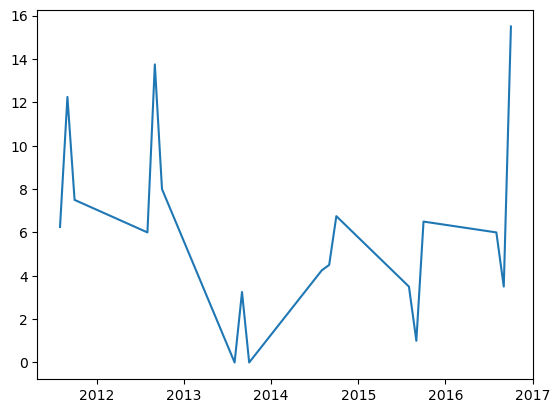

In [19]:
print('August: ',august.count(dim='time').values)
print('September: ',september.count(dim='time').values)
print('October: ',october.count(dim='time').values)

counts=[august.count(dim='time').values,
        september.count(dim='time').values,
        october.count(dim='time').values]
print(counts)

plt.plot(ha_index['time'],ha_index['ha'])
#plt.fill_between(ha_index['time'].values,ha_index['ha'],color='lightgreen')
#plt.fill_between(ha_index['time'].values,september,y2=6,color='red')
#plt.fill_between(ha_index['time'].values,october,y2=3,color='blue')
#plt.axhline(0,color='black',linewidth=0.5)
#plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
#plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted') ;

In [20]:
ha_anoms = ha_index.groupby('time.month')-clim_index

In [21]:
ha_anoms

<xarray.Dataset>
Dimensions:  (time: 18)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
    month    (time) int64 8 9 10 8 9 10 8 9 10 8 9 10 8 9 10 8 9 10
Data variables:
    ha       (time) float32 1.917 5.875 0.125 1.667 ... 1.667 -2.875 8.125

August:  15
September:  16
October:  3
[array(15), array(16), array(3)]


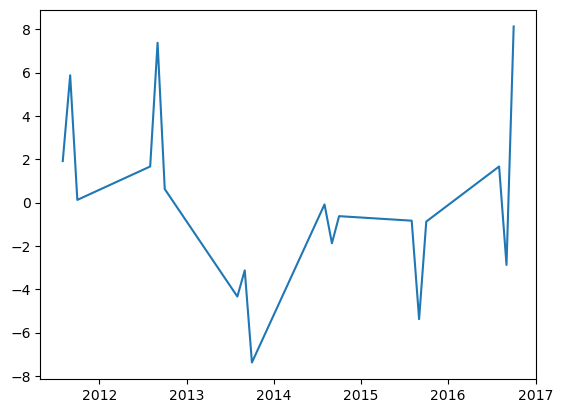

In [22]:
august=ha_anoms['ha'].where(ha_anoms['ha']<=4)
september=ha_anoms['ha'].where(ha_anoms['ha']<=6)
october=ha_anoms['ha'].where(ha_anoms['ha']>=3)

print('August: ',august.count(dim='time').values)
print('September: ',september.count(dim='time').values)
print('October: ',october.count(dim='time').values)

counts=[august.count(dim='time').values,
        september.count(dim='time').values,
        october.count(dim='time').values]
print(counts)

plt.plot(ha_anoms['time'],ha_anoms['ha'])

In [23]:
clim = ts_monthly['ts'].groupby('time.month').mean()
clim

<xarray.DataArray 'ts' (month: 3, latitude: 53, longitude: 89)>
array([[[303.04672586, 301.65720962, 301.48691329, ..., 301.34309666,
         301.1486067 , 300.98341895],
        [303.74269326, 301.68556968, 300.81742473, ..., 301.28812376,
         301.04215544, 300.81876816],
        [304.46325716, 304.07925317, 303.99471008, ..., 301.1562685 ,
         300.9464565 , 300.7502199 ],
        ...,
        [302.94685963, 302.94376837, 302.92616083, ..., 302.11540837,
         302.09524684, 302.07132204],
        [302.90478979, 302.89578464, 302.88261286, ..., 302.09000491,
         302.0680962 , 302.03462892],
        [302.85720981, 302.84914443, 302.84309637, ..., 302.05384892,
         302.0246822 , 301.98771996]],

       [[298.41276936, 297.34874174, 297.0551303 , ..., 300.71540803,
         300.57610262, 300.46318597],
        [299.05957497, 297.39013036, 296.73013022, ..., 300.69707519,
         300.54054756, 300.40638029],
        [299.77874133, 299.25915841, 299.10901947, ..., 300.67179773,
         300.52138074, 300.38526967],
...
        [302.5791587 , 302.58540887, 302.59263089, ..., 302.26457464,
         302.24485249, 302.23235228],
        [302.56429719, 302.57735291, 302.58526993, ..., 302.26124123,
         302.24846336, 302.23429697],
        [302.5623528 , 302.57513055, 302.58082496, ..., 302.2442969 ,
         302.2434633 , 302.23013013]],

       [[289.52744011, 288.8707207 , 288.93908131, ..., 299.23477062,
         299.1788851 , 299.05823402],
        [290.15779146, 288.82938027, 288.71156756, ..., 299.33083804,
         299.20161895, 299.04598133],
        [290.79142451, 290.47207475, 290.38246628, ..., 299.31769987,
         299.1716582 , 299.00105949],
        ...,
        [301.43704947, 301.45060396, 301.44861182, ..., 301.8012677 ,
         301.81290833, 301.82409354],
        [301.48227104, 301.48221878, 301.46970578, ..., 301.83124165,
         301.8418798 , 301.86223141],
        [301.50641175, 301.49193239, 301.46714056, ..., 301.86064291,
         301.87527863, 301.88927587]]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * month      (month) int64 8 9 10

In [24]:
clim[0,:,:]

<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[303.04672586, 301.65720962, 301.48691329, ..., 301.34309666,
        301.1486067 , 300.98341895],
       [303.74269326, 301.68556968, 300.81742473, ..., 301.28812376,
        301.04215544, 300.81876816],
       [304.46325716, 304.07925317, 303.99471008, ..., 301.1562685 ,
        300.9464565 , 300.7502199 ],
       ...,
       [302.94685963, 302.94376837, 302.92616083, ..., 302.11540837,
        302.09524684, 302.07132204],
       [302.90478979, 302.89578464, 302.88261286, ..., 302.09000491,
        302.0680962 , 302.03462892],
       [302.85720981, 302.84914443, 302.84309637, ..., 302.05384892,
        302.0246822 , 301.98771996]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      int64 8

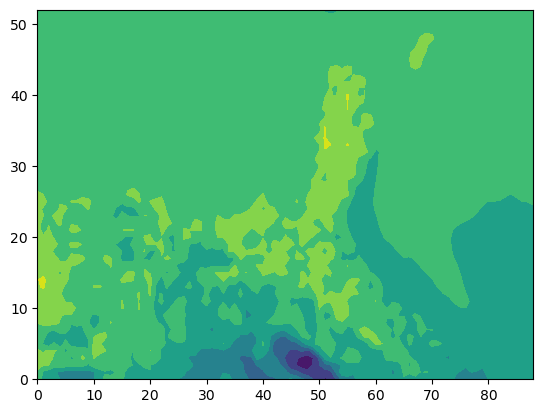

In [25]:
plt.contourf(clim[0,:,:])

In [26]:
ds_anoms = ts_monthly['ts'].groupby('time.month')-clim

In [27]:
ds_anoms

<xarray.DataArray 'ts' (time: 18, latitude: 53, longitude: 89)>
array([[[ 2.10421679,  2.35905575,  2.77693308, ...,  0.2465566 ,
          0.22088537,  0.2247828 ],
        [ 2.25744481,  3.54359961,  3.20206837, ...,  0.23540062,
          0.22491865,  0.21685274],
        [ 2.28204042,  2.16443216,  1.99978322, ...,  0.23741638,
          0.22626192,  0.2095946 ],
        ...,
        [ 0.11053606,  0.12330484,  0.12800861, ...,  0.17101977,
          0.15489049,  0.13365223],
        [ 0.10341181,  0.11886822,  0.11591048, ...,  0.17384195,
          0.16591111,  0.14131452],
        [ 0.10905719,  0.1163141 ,  0.09252384, ...,  0.17531988,
          0.15851974,  0.11241757]],

       [[ 1.23246125,  1.40565508,  1.39343359, ..., -1.75851156,
         -1.77920524, -1.75545536],
        [ 0.96398943,  1.89760056,  1.51593403, ..., -1.78850967,
         -1.74198291, -1.62948286],
        [ 0.88065529,  0.88857337,  0.77537893, ..., -1.76239832,
         -1.68114866, -1.54170456],
...
        [ 0.19024412,  0.17982729,  0.17927183, ..., -0.40183864,
         -0.3421171 , -0.26461699],
        [ 0.22760599,  0.22288411,  0.21663411, ..., -0.36600579,
         -0.29656135, -0.21072773],
        [ 0.29205089,  0.27510596,  0.26357812, ..., -0.30656115,
         -0.25406053, -0.1765611 ]],

       [[ 1.64786406,  1.74583427,  1.79942691, ...,  0.40584723,
          0.22173059,  0.06035086],
        [ 1.84806029,  1.43490744,  1.55068882, ...,  0.41790501,
          0.35407563,  0.32205757],
        [ 1.82801962,  1.68627644,  1.59393076, ...,  0.62275962,
          0.55528696,  0.56260518],
        ...,
        [ 0.54973976,  0.5939188 ,  0.63005249, ...,  0.08083407,
          0.10919293,  0.1426175 ],
        [ 0.55943958,  0.59753915,  0.63481836, ...,  0.06546851,
          0.10178379,  0.12549527],
        [ 0.58686141,  0.63407588,  0.67488325, ...,  0.06270838,
          0.09463461,  0.11555902]]])
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      (time) int64 8 9 10 8 9 10 8 9 10 8 9 10 8 9 10 8 9 10

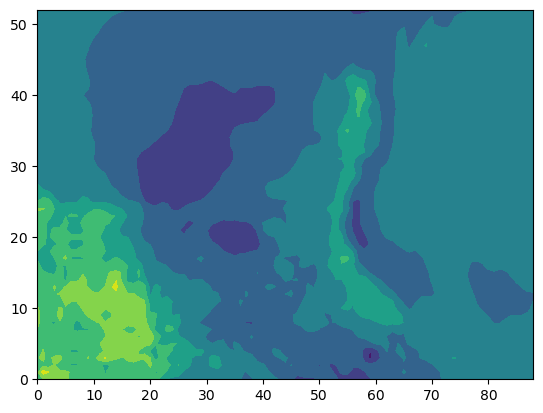

In [28]:
plt.contourf(ds_anoms[0,:,:])

In [29]:
august_ts = ds_anoms.sel(time=august.dropna(dim='time')['time']).mean(dim='time')
september_ts = ds_anoms.sel(time=september.dropna(dim='time')['time']).mean(dim='time')
october_ts = ds_anoms.sel(time=october.dropna(dim='time')['time']).mean(dim='time')

comp = [august_ts,september_ts,october_ts]
comp

[<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
 array([[-0.25707475, -0.27308768, -0.28386416, ...,  0.09680041,
          0.10727845,  0.11759271],
        [-0.2334028 , -0.27034076, -0.24889287, ...,  0.09249646,
          0.08843702,  0.07973822],
        [-0.22617782, -0.21456168, -0.19575707, ...,  0.06785799,
          0.06280075,  0.04949801],
        ...,
        [ 0.00626305,  0.00131776, -0.0037948 , ..., -0.02858766,
         -0.02771899, -0.02894733],
        [ 0.00469051, -0.00033085, -0.0034273 , ..., -0.02389664,
         -0.02491024, -0.02682429],
        [ 0.00482534, -0.00195186, -0.0071909 , ..., -0.0191385 ,
         -0.02198912, -0.02566185]])
 Coordinates:
   * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
   * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0,
 <xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
 array([[-0.16397875, -0.16816626, -0.17903305, ..., -0.01915659,
         -0.01062678,  0

Text(0.5, 0.98, 'Composite Surface Temperature Anomalies with Hurricane Activity Anomalies')

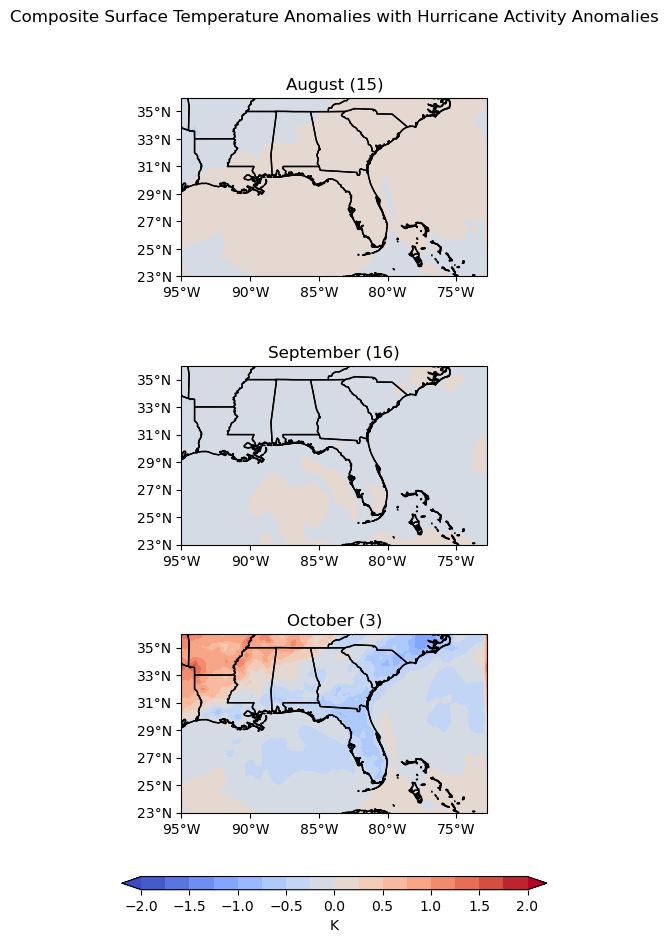

In [49]:
labels=['August','September', 'October']
clevs = np.arange(-2.0,2.1,0.25)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,month in enumerate(comp):

        # Select the season
        data = comp[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp[i]['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,comp[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(23,37,2),crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('Composite Surface Temperature Anomalies with Hurricane Activity Anomalies')